In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

# Load Data

In [2]:
data_train_1 = pickle.load(open("data/data_train_flatten_batch_1.pkl", "rb"))
data_train_2 = pickle.load(open("data/data_train_flatten_batch_2.pkl", "rb"))
labels_train_1 = pickle.load(open("data/labels_train_batch_1.pkl", "rb"))
labels_train_2 = pickle.load(open("data/labels_train_batch_2.pkl", "rb"))

In [3]:
data_train = np.concatenate((data_train_1, data_train_2))
labels_train = np.concatenate((labels_train_1, labels_train_2))

In [4]:
data_test = pickle.load(open("data/data_test_flatten.pkl", "rb"))
labels_test = pickle.load(open("data/labels_test.pkl", "rb"))

In [5]:
# Shuffle train set
data_train, labels_train = shuffle(data_train, labels_train, random_state=25)

# Scale Data

In [6]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(data_train)
X_test_std = scaler.transform(data_test)

# Train Model

In [7]:
m = LogisticRegression()

parameters = [{
    "penalty": ["l1", "l2", "elasticnet", None]
}]

grid_search = GridSearchCV(m, parameters, verbose=2)
grid_search.fit(X_train_std, labels_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................penalty=l1; total time=   0.1s
[CV] END .........................................penalty=l1; total time=   0.1s
[CV] END .........................................penalty=l1; total time=   0.1s
[CV] END .........................................penalty=l1; total time=   0.1s
[CV] END .........................................penalty=l1; total time=   0.1s
[CV] END .........................................penalty=l2; total time=  12.1s
[CV] END .........................................penalty=l2; total time=  13.6s
[CV] END .........................................penalty=l2; total time=  16.9s
[CV] END .........................................penalty=l2; total time=  17.2s
[CV] END .........................................penalty=l2; total time=  17.8s
[CV] END .................................penalty=elasticnet; total time=   0.3s
[CV] END .................................penalty

In [8]:
print("Model optimal parameters".upper())
print("penalty:", model.get_params()["penalty"])

MODEL OPTIMAL PARAMETERS
penalty: l2


# Test Model

In [9]:
predictions = model.predict(X_test_std)
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy score:", accuracy)

Accuracy score: 0.3979


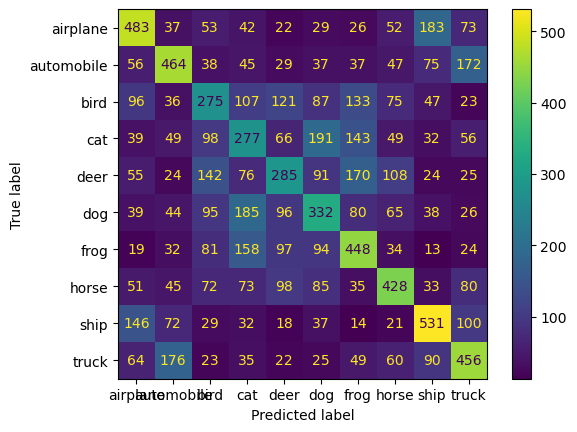

In [10]:
cm = confusion_matrix(labels_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Save Model

In [11]:
model_file_name = "logistic_regression_32x32.pkl"
pickle.dump(model, open(model_file_name, "wb"))

# Black And White

## Load data

In [12]:
train_batches = []
labels_batches = []

for i in [1, 2, 3, 4, 5]:
    data_filepath = "data/data_train_bw_flatten_batch_" + str(i) + ".pkl"
    labels_filepath = "data/labels_train_bw_batch_" + str(i) + ".pkl"
    train_batches.append(pickle.load(open(data_filepath, "rb")))
    labels_batches.append(pickle.load(open(labels_filepath, "rb")))
    
data_train_bw = np.concatenate(train_batches)
labels_train_bw = np.concatenate(labels_batches)

data_test_bw = pickle.load(open("data/data_test_bw_flatten.pkl", "rb"))
labels_test_bw = pickle.load(open("data/labels_test_bw.pkl", "rb"))

# Shuffle train set
data_train_bw, labels_train_bw = shuffle(data_train_bw, labels_train_bw, random_state=25)

## Scale data

In [13]:
scaler = StandardScaler()

X_train_std_bw = scaler.fit_transform(data_train_bw)
X_test_std_bw = scaler.transform(data_test_bw)

## Train model

In [14]:
m = LogisticRegression()

parameters = [{
    "penalty": ["l1", "l2", "elasticnet", None]
}]

grid_search = GridSearchCV(m, parameters, verbose=2)
grid_search.fit(X_train_std_bw, labels_train_bw)
model_bw = grid_search.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l1; total time=   0.0s
[CV] END .........................................penalty=l2; total time=   7.6s
[CV] END .........................................penalty=l2; total time=   8.2s
[CV] END .........................................penalty=l2; total time=   8.7s
[CV] END .........................................penalty=l2; total time=   7.4s
[CV] END .........................................penalty=l2; total time=   7.6s
[CV] END .................................penalty=elasticnet; total time=   0.0s
[CV] END .................................penalty

In [15]:
print("Model optimal parameters".upper())
print("penalty:", model_bw.get_params()["penalty"])

MODEL OPTIMAL PARAMETERS
penalty: l2


## Test model

In [16]:
predictions_bw = model_bw.predict(X_test_std_bw)
accuracy_bw = accuracy_score(labels_test_bw, predictions_bw)
print("Accuracy score:", accuracy_bw)

Accuracy score: 0.2797


[]

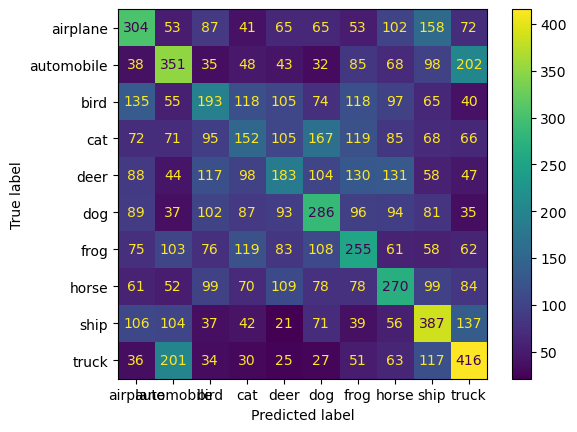

In [17]:
cm = confusion_matrix(labels_test_bw, predictions_bw, labels=model_bw.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_bw.classes_)
disp.plot()
plt.plot()

## Save model

In [18]:
model_file_name_bw = "logistic_regression_32x32_bw.pkl"
pickle.dump(model_bw, open(model_file_name_bw, "wb"))